In [1]:
%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

## The Data

In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**Run the import line below to read in the data**

In [4]:
df = pd.read_csv('data/UK_foods.csv',index_col='Unnamed: 0')

In [5]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**Transpose the DataFrame so that the columns are now the index.**

In [6]:
df = df.transpose()

In [7]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

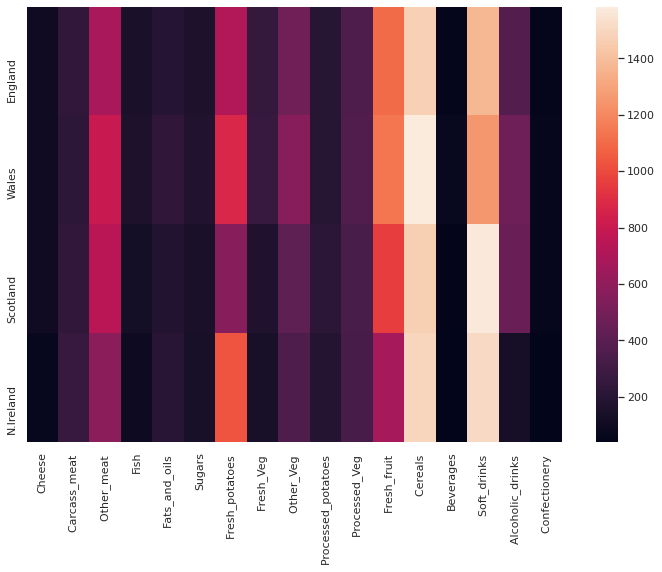

In [8]:
sns.heatmap(df);

**Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [10]:
encoder = Sequential()
encoder.add(Dense(units = 8, activation='relu', input_shape=[17]))
encoder.add(Dense(units = 4, activation='relu', input_shape=[8]))
encoder.add(Dense(units = 2, activation='relu', input_shape=[4]))

**Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [11]:
decoder = Sequential()
decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu', input_shape=[4]))
decoder.add(Dense(units=17, activation='relu', input_shape=[8]))

**Combine the encoder and decoder to be an autoencoder and compile the model.**

In [12]:
autoencoder = Sequential([encoder, decoder])

In [13]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.0))

**Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_df = scaler.fit_transform(df)

In [17]:
scaled_df.shape

(4, 17)

**Fit the autoencoder to the scaled data for 15 epochs.**

In [18]:
autoencoder.fit(scaled_df, scaled_df, epochs = 15)

Epoch 1/15
1/1 [==============================] - 0s 814us/step - loss: 0.4222
Epoch 2/15
1/1 [==============================] - 0s 559us/step - loss: 0.3883
Epoch 3/15
1/1 [==============================] - 0s 571us/step - loss: 0.3657
Epoch 4/15
1/1 [==============================] - 0s 563us/step - loss: 0.3504
Epoch 5/15
1/1 [==============================] - 0s 587us/step - loss: 0.3411
Epoch 6/15
1/1 [==============================] - 0s 718us/step - loss: 0.3358
Epoch 7/15
1/1 [==============================] - 0s 528us/step - loss: 0.3324
Epoch 8/15
1/1 [==============================] - 0s 531us/step - loss: 0.3299
Epoch 9/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3278
Epoch 10/15
1/1 [==============================] - 0s 710us/step - loss: 0.3259
Epoch 11/15
1/1 [==============================] - 0s 625us/step - loss: 0.3242
Epoch 12/15
1/1 [==============================] - 0s 834us/step - loss: 0.3224
Epoch 13/15
1/1 [==============================] - 

**Run the scaled data through only the encoder and predict the reduced dimensionalty output.**

In [19]:
encoded_2dim = encoder.predict(scaled_df)

**Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [20]:
encoded_2dim.shape

(4, 2)

In [21]:
df.shape

(4, 17)

In [22]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [23]:
results = pd.DataFrame(data=encoded_2dim, index=df.index, columns=['C1','C2'])

In [24]:
results

,C1,C2
England,1.577461,0.000000
Wales,2.194606,0.000173
Scotland,0.697010,0.000000
N.Ireland,0.213041,0.091223


In [26]:
results=results.reset_index()

In [27]:
results

,index,C1,C2
0,England,1.577461,0.000000
1,Wales,2.194606,0.000173
2,Scotland,0.697010,0.000000
3,N.Ireland,0.213041,0.091223


**Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

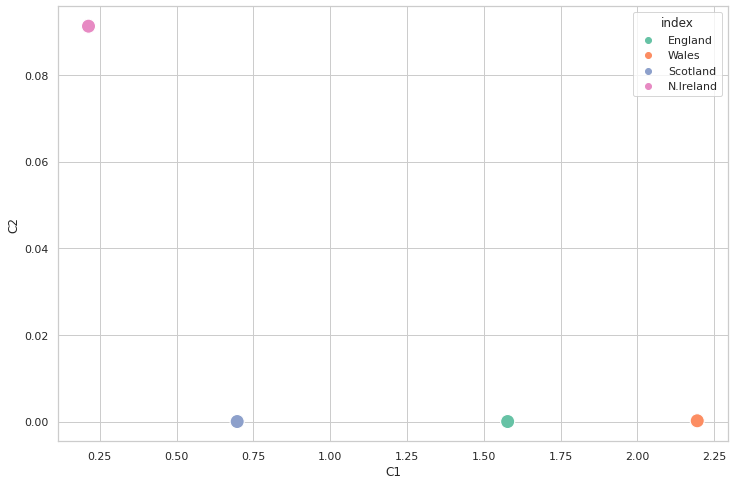

In [31]:
sns.scatterplot(data=results, x = 'C1', y = 'C2', hue='index', s=200);

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)